In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras import Model
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical
import seaborn as sns

In [74]:
df = pd.read_csv("E:\\datasets\\anemia.csv")

In [75]:
features = ['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']
df['data'] = df[features].values.tolist()

df['target'] = df['Anaemic']
df = df[['data', 'target']]

df['target'] = LabelEncoder().fit_transform(df['target'])  # Yes = 1, No = 0

df['data'] = df['data'].apply(lambda row: [1 if str(feature).strip() == 'M' else 0 if str(feature).strip() == 'F' else feature for feature in row])

df

,data,target
0,"[1, 43.2555, 30.8421, 25.9025, 6.3]",1
1,"[0, 45.6033, 28.19, 26.2067, 13.5]",0
2,"[0, 45.0107, 28.9677, 26.0215, 11.7]",0
3,"[0, 44.5398, 28.9899, 26.4703, 13.5]",0
4,"[1, 43.287, 30.6972, 26.0158, 12.4]",0
...,...,...
99,"[0, 49.9999, 29.286, 20.7141, 14.5]",1
100,"[1, 42.2324, 30.6757, 27.0919, 6.3]",1
101,"[0, 45.6064, 31.9084, 22.4852, 12.7]",0
102,"[1, 45.2095, 29.2769, 25.5136, 13.4]",0


In [76]:
X = np.array(df['data'].tolist())
y = np.array(df['target'].tolist())

num_features =X.shape[1]
num_classes = len(np.unique(y))

scaler = StandardScaler()
X = scaler.fit_transform(X)

y_one_hot = to_categorical(y, num_classes=num_classes)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y_one_hot,test_size=0.3,random_state=42)

In [86]:
input_layer = Input(shape=(num_features, ))
hidden_layer_1 = Dense(num_features, activation='relu')(input_layer)
hidden_layer_2 = Dense(num_features, activation='relu')(hidden_layer_1)
output_layer = Dense(num_classes, activation='sigmoid')(hidden_layer_2)

In [87]:
mlp_classifier = Model(inputs=[input_layer], outputs=[output_layer])
mlp_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
training_history = mlp_classifier.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0],validation_split=0.3, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 1.0000 - loss: 0.0788 - val_accuracy: 0.9091 - val_loss: 0.2050
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 0.0786 - val_accuracy: 0.9091 - val_loss: 0.2051
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 1.0000 - loss: 0.0784 - val_accuracy: 0.9091 - val_loss: 0.2052
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 0.0782 - val_accuracy: 0.9091 - val_loss: 0.2053
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.0779 - val_accuracy: 0.9091 - val_loss: 0.2053
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.0777 - val_accuracy: 0.9091 - val_loss: 0.2054
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 1.0000 - loss: 0.0775 - val_accuracy: 0.9091 - val_loss: 0.2055
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 0.0773 - val_accuracy: 0.9091 - val_loss

In [119]:
test_loss, test_accuracy = mlp_classifier.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9062 - loss: 0.2031
Test Loss: 0.2030581831932068
Test Accuracy: 0.90625


In [120]:
y_pred_prob = mlp_classifier.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [121]:
class_report = classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.96      0.94        25
     Class 1       0.83      0.71      0.77         7

    accuracy                           0.91        32
   macro avg       0.88      0.84      0.86        32
weighted avg       0.90      0.91      0.90        32



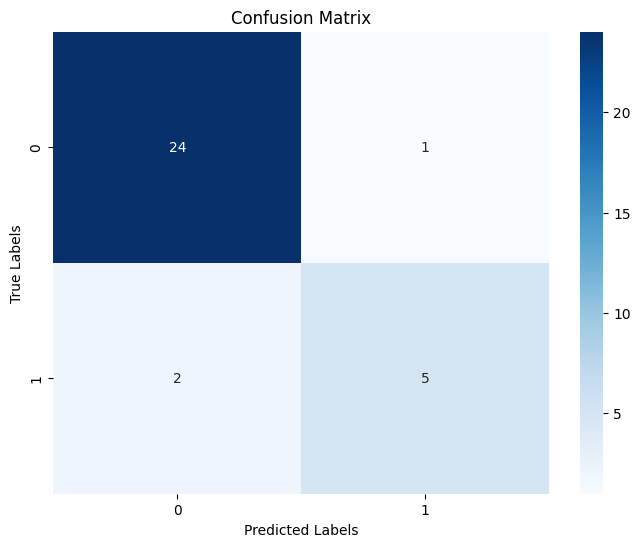

In [122]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

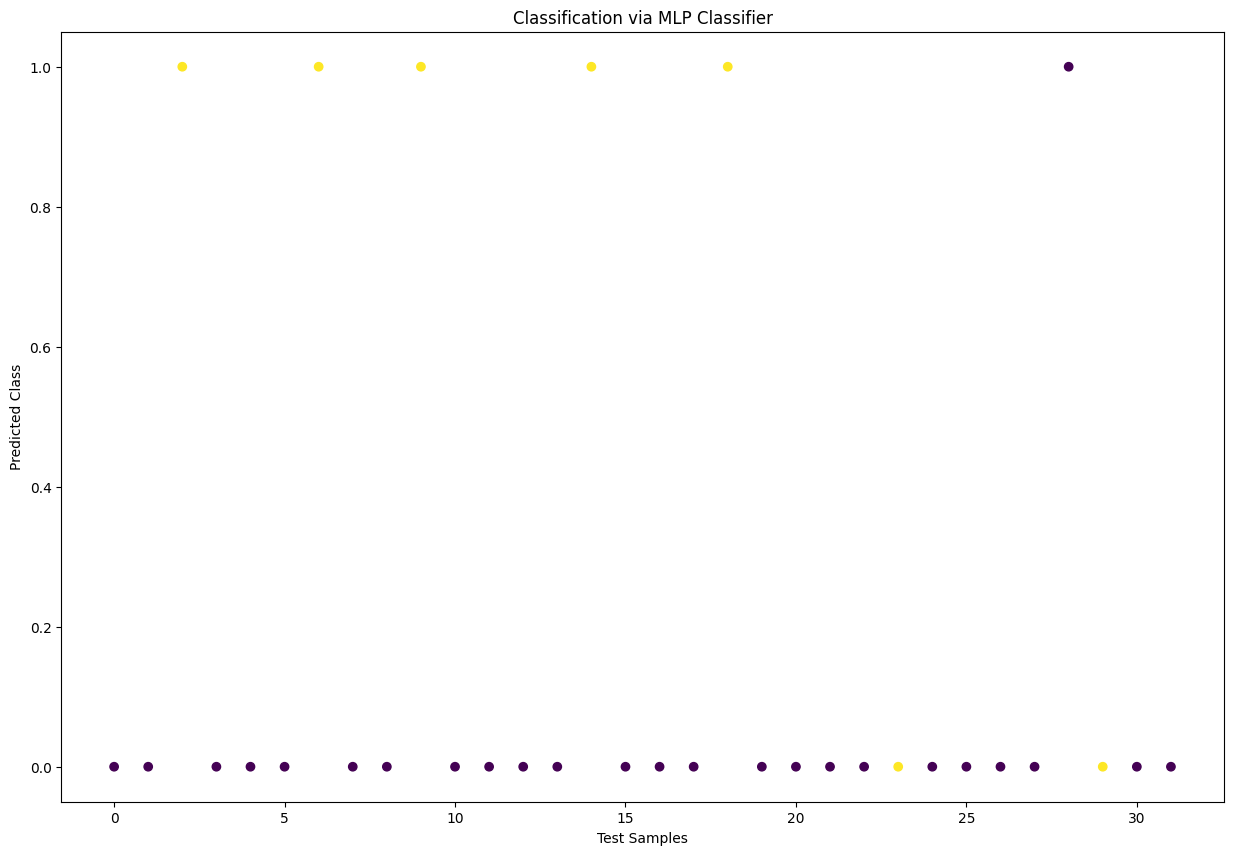

In [123]:
plt.figure(figsize=(15, 10))
scatter = plt.scatter(range(len(y_pred)), y_pred, marker='o', c=y_true, cmap='viridis', label='Predicted Class')

plt.xlabel('Test Samples')
plt.ylabel('Predicted Class')
plt.title('Classification via MLP Classifier')
plt.show()